#### HighRisk model evaluation

In [1]:
#Load the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_curve, auc, precision_recall_curve, average_precision_score
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_curve, roc_auc_score, precision_recall_curve, average_precision_score,confusion_matrix


In [2]:
#En son veriler
X_train=pd.read_csv("X_train.csv", index_col="ID")
X_test=pd.read_csv("X_test.csv", index_col="ID")
y_train=pd.read_csv("y_train.csv", index_col="ID")
y_test=pd.read_csv("y_test.csv", index_col="ID")

In [4]:
####train encoding
y_train_hr=y_train["HighRisk"]
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the class labels to numeric values
y_train_hr_encode = label_encoder.fit_transform(y_train_hr)

# Now, if you want to get the original labels from the encoded values:
original_labels = label_encoder.inverse_transform(y_train_hr_encode)
y_train_hr_encode.shape

(298,)

In [5]:
y_train_hr.value_counts()

HighRisk
LR    161
HR    137
Name: count, dtype: int64

In [7]:
####test encoding
y_test_hr=y_test["HighRisk"]
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the class labels to numeric values
y_test_hr_encode = label_encoder.fit_transform(y_test_hr)

# Now, if you want to get the original labels from the encoded values:
original_labels = label_encoder.inverse_transform(y_test_hr_encode)
y_test_hr_encode.shape

(75,)

In [8]:
#### Import selected features for INSS
selected_features_hr = pd.read_csv("final_common_features_for_HighRisk.csv",index_col=False)
#### Put them in a list
selected_features = selected_features_hr['FeatureName'].tolist()

#### selected feature matrix for X_train
X_train_sub_hr = X_train[selected_features]
print(X_train_sub_hr.shape)

#### selected feature matrix for X_train
X_test_sub_hr = X_test[selected_features]
print(X_test_sub_hr.shape)

(298, 179)
(75, 179)


#### RANDOM FOREST MODEL EVALUATION FOR SELECTED FEATURES

Confusion Matrix:
    HR  LR
HR  33   5
LR   1  36
Accuracy: 0.92
Precision: 0.8780487804878049
Recall: 0.972972972972973
F1-score: 0.923076923076923
ROC-AUC: 0.9836415362731152
PR-AUC: 0.9838907436331545


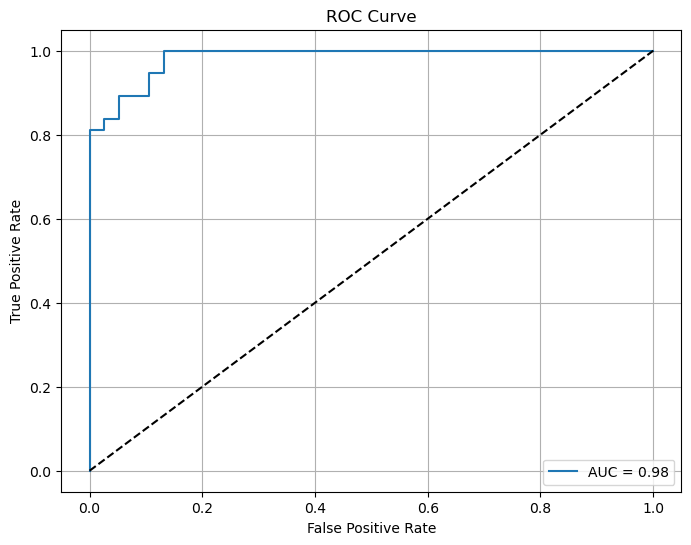

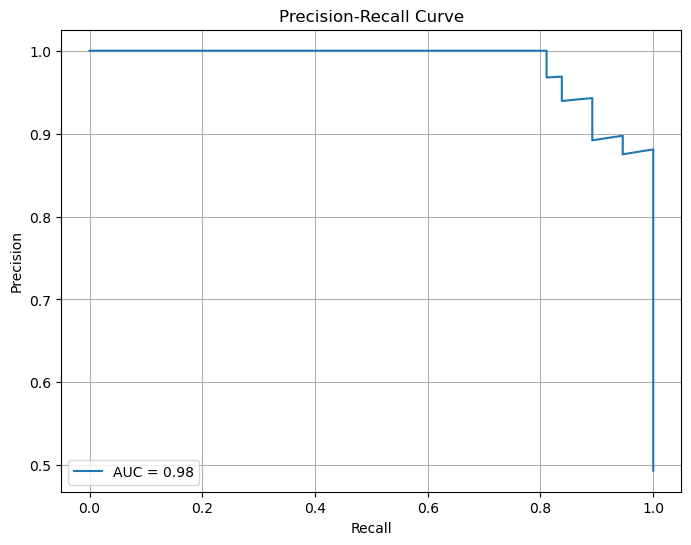

In [9]:
# Create a classifier
best_params = {'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 200}
clf = RandomForestClassifier(**best_params, random_state=42)

X_train=X_train_sub_hr.copy()
X_test=X_test_sub_hr.copy()
y_train= y_train_hr_encode.copy()
y_test= y_test_hr_encode.copy()
original_labels = label_encoder.inverse_transform(y_test_hr_encode)
class_labels= np.unique(original_labels)


# Train the Random Forest classifier
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred_probs = clf.predict_proba(X_test)
y_pred = (y_pred_probs[:, 1] > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate accuracy, precision, recall, and F1-score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Calculate ROC-AUC for this fold
fpr, tpr, _ = roc_curve(y_test, y_pred_probs[:, 1])
roc_auc = roc_auc_score(y_test, y_pred_probs[:, 1])

# Calculate and print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix_df = pd.DataFrame(conf_matrix, index=class_labels, columns=class_labels)
print("Confusion Matrix:")
print(confusion_matrix_df)

# Calculate Precision-Recall values
precision_fold, recall_fold, _ = precision_recall_curve(y_test, y_pred_probs[:, 1])

# Calculate PR-AUC for this fold
pr_auc = average_precision_score(y_test, y_pred_probs[:, 1])

# Print metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("ROC-AUC:", roc_auc)
print("PR-AUC:", pr_auc)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.grid()
plt.show()

# Plot the Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall_fold, precision_fold, label=f'AUC = {pr_auc:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.grid()
plt.show()


#### SVM MODEL EVALUATION FOR SELECTED FEATURES

Confusion Matrix:
    HR  LR
HR  34   4
LR   2  35
Accuracy: 0.92
Precision: 0.8974358974358975
Recall: 0.9459459459459459
F1-score: 0.9210526315789475
ROC-AUC: 0.9793741109530583
PR-AUC: 0.9803536932625052


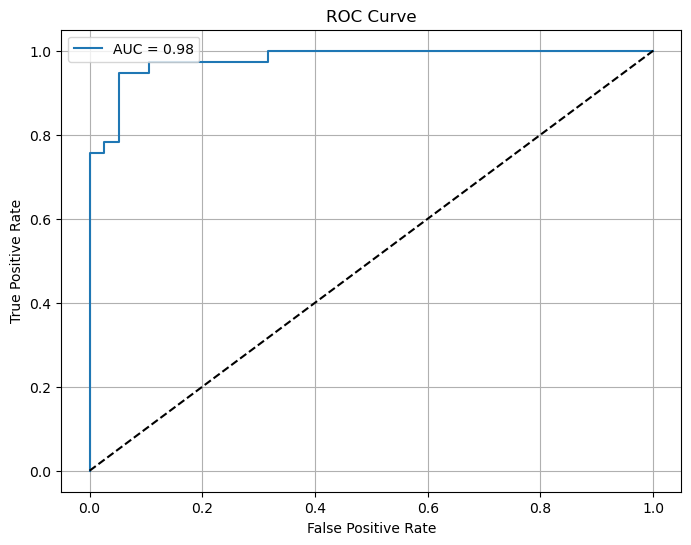

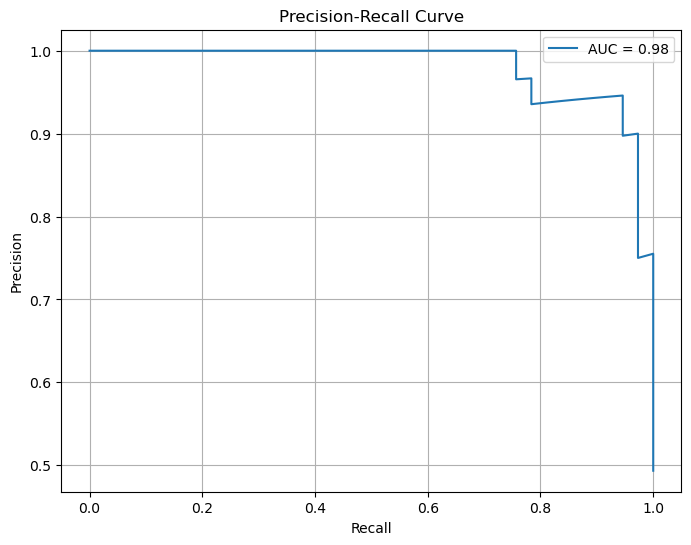

In [11]:
# Create a classifier
best_params = {'C': 166.6342834696808, 'gamma': 0.0028763588986747616}
clf = SVC(**best_params, random_state=42, probability=True)

X_train=X_train_sub_hr.copy()
X_test=X_test_sub_hr.copy()
y_train= y_train_hr_encode.copy()
y_test= y_test_hr_encode.copy()
original_labels = label_encoder.inverse_transform(y_test_hr_encode)
class_labels= np.unique(original_labels)


# Train the Random Forest classifier
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred_probs = clf.predict_proba(X_test)
y_pred = (y_pred_probs[:, 1] > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate accuracy, precision, recall, and F1-score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Calculate ROC-AUC for this fold
fpr, tpr, _ = roc_curve(y_test, y_pred_probs[:, 1])
roc_auc = roc_auc_score(y_test, y_pred_probs[:, 1])

# Calculate and print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix_df = pd.DataFrame(conf_matrix, index=class_labels, columns=class_labels)
print("Confusion Matrix:")
print(confusion_matrix_df)

# Calculate Precision-Recall values
precision_fold, recall_fold, _ = precision_recall_curve(y_test, y_pred_probs[:, 1])

# Calculate PR-AUC for this fold
pr_auc = average_precision_score(y_test, y_pred_probs[:, 1])

# Print metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("ROC-AUC:", roc_auc)
print("PR-AUC:", pr_auc)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.grid()
plt.show()

# Plot the Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall_fold, precision_fold, label=f'AUC = {pr_auc:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.grid()
plt.show()


#### LOGISTIC REGRESSION MODEL EVALUATION FOR SELECTED FEATURES

Confusion Matrix:
    HR  LR
HR  36   2
LR   1  36
Accuracy: 0.96
Precision: 0.9473684210526315
Recall: 0.972972972972973
F1-score: 0.9599999999999999
ROC-AUC: 0.9871977240398293
PR-AUC: 0.9881354644857141


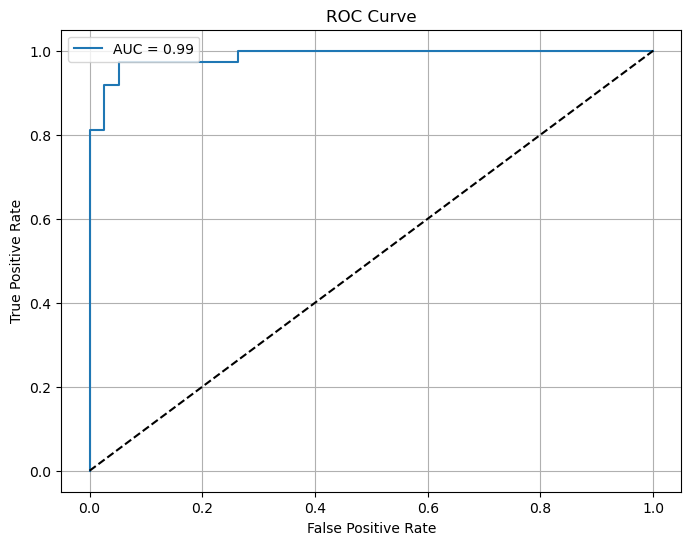

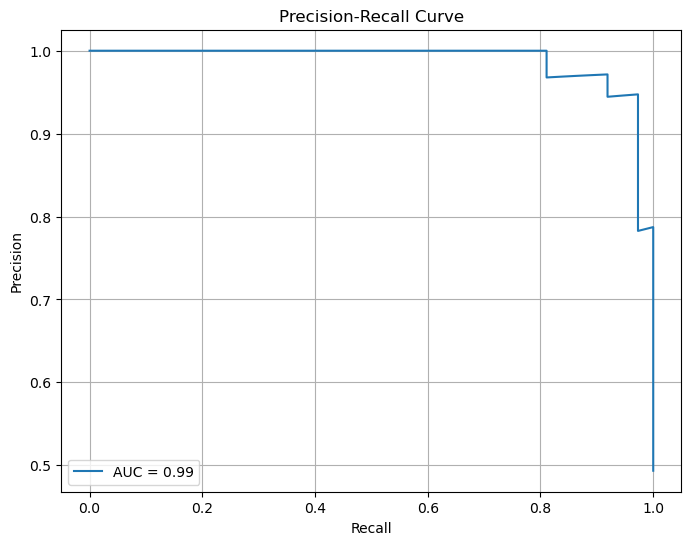

In [12]:
# Create a classifier
best_params = {'C': 78.47599703514607, 'penalty': 'l1', 'solver': 'liblinear'}
clf = LogisticRegression(**best_params, random_state=42)

X_train=X_train_sub_hr.copy()
X_test=X_test_sub_hr.copy()
y_train= y_train_hr_encode.copy()
y_test= y_test_hr_encode.copy()
original_labels = label_encoder.inverse_transform(y_test_hr_encode)
class_labels= np.unique(original_labels)


# Train the Random Forest classifier
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred_probs = clf.predict_proba(X_test)
y_pred = (y_pred_probs[:, 1] > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate accuracy, precision, recall, and F1-score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Calculate ROC-AUC for this fold
fpr, tpr, _ = roc_curve(y_test, y_pred_probs[:, 1])
roc_auc = roc_auc_score(y_test, y_pred_probs[:, 1])

# Calculate and print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix_df = pd.DataFrame(conf_matrix, index=class_labels, columns=class_labels)
print("Confusion Matrix:")
print(confusion_matrix_df)

# Calculate Precision-Recall values
precision_fold, recall_fold, _ = precision_recall_curve(y_test, y_pred_probs[:, 1])

# Calculate PR-AUC for this fold
pr_auc = average_precision_score(y_test, y_pred_probs[:, 1])

# Print metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("ROC-AUC:", roc_auc)
print("PR-AUC:", pr_auc)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.grid()
plt.show()

# Plot the Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall_fold, precision_fold, label=f'AUC = {pr_auc:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.grid()
plt.show()

#### RANDOM FOREST MODEL EVALUATION FOR ALL FEATURES

Confusion Matrix:
    HR  LR
HR  33   5
LR   2  35
Accuracy: 0.9066666666666666
Precision: 0.875
Recall: 0.9459459459459459
F1-score: 0.9090909090909091
ROC-AUC: 0.9850640113798008
PR-AUC: 0.9861444544737077


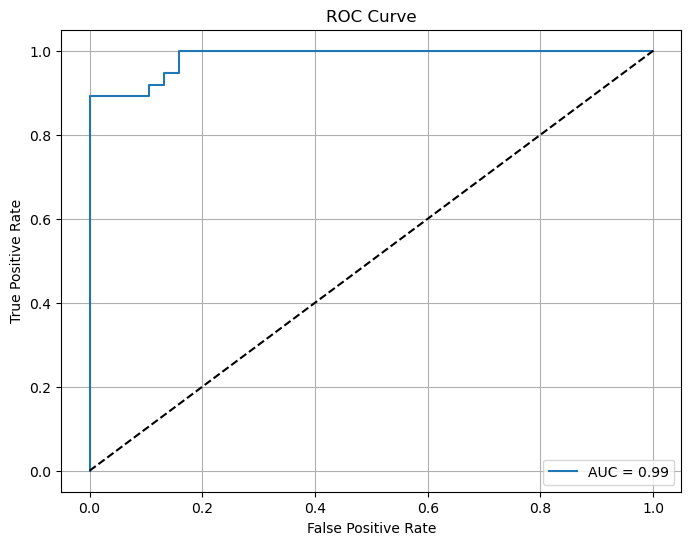

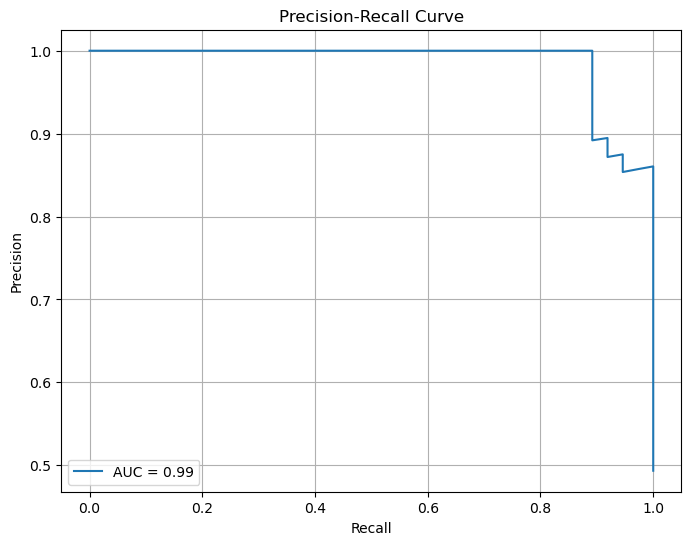

In [13]:
# Create a classifier
best_params = {'max_depth': 5, 'min_samples_split': 5, 'n_estimators': 200}
clf = RandomForestClassifier(**best_params, random_state=42)

X_train=pd.read_csv("X_train.csv", index_col="ID")
X_test=pd.read_csv("X_test.csv", index_col="ID")
y_train= y_train_hr_encode.copy()
y_test= y_test_hr_encode.copy()
original_labels = label_encoder.inverse_transform(y_test_hr_encode)
class_labels= np.unique(original_labels)


# Train the Random Forest classifier
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred_probs = clf.predict_proba(X_test)
y_pred = (y_pred_probs[:, 1] > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate accuracy, precision, recall, and F1-score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Calculate ROC-AUC for this fold
fpr, tpr, _ = roc_curve(y_test, y_pred_probs[:, 1])
roc_auc = roc_auc_score(y_test, y_pred_probs[:, 1])

# Calculate and print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix_df = pd.DataFrame(conf_matrix, index=class_labels, columns=class_labels)
print("Confusion Matrix:")
print(confusion_matrix_df)

# Calculate Precision-Recall values
precision_fold, recall_fold, _ = precision_recall_curve(y_test, y_pred_probs[:, 1])

# Calculate PR-AUC for this fold
pr_auc = average_precision_score(y_test, y_pred_probs[:, 1])

# Print metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("ROC-AUC:", roc_auc)
print("PR-AUC:", pr_auc)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.grid()
plt.show()

# Plot the Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall_fold, precision_fold, label=f'AUC = {pr_auc:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.grid()
plt.show()

#### SVM MODEL EVALUATION FOR ALL FEATURES

Confusion Matrix:
    HR  LR
HR  34   4
LR   6  31
Accuracy: 0.8666666666666667
Precision: 0.8857142857142857
Recall: 0.8378378378378378
F1-score: 0.8611111111111112
ROC-AUC: 0.9370554765291608
PR-AUC: 0.9430289737243276


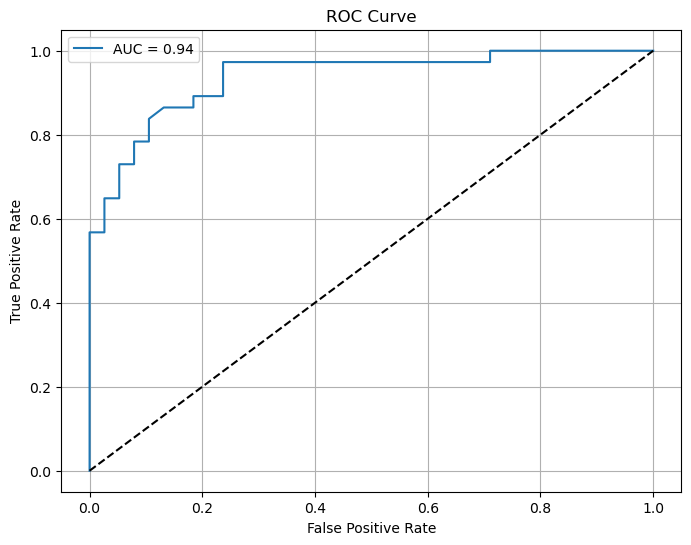

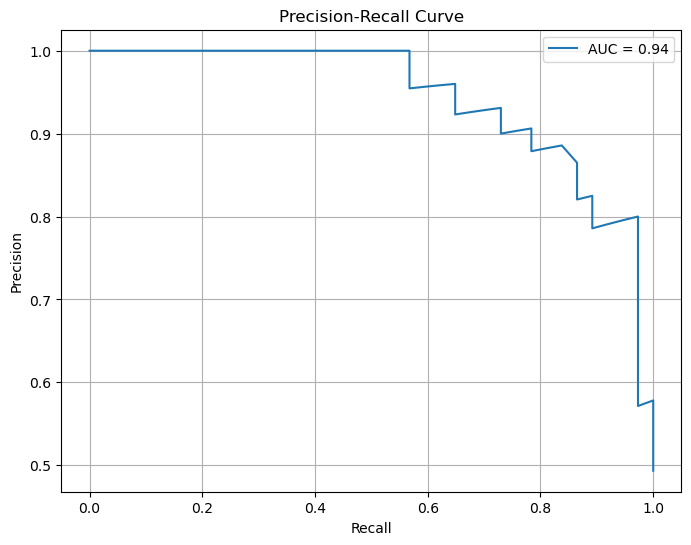

In [15]:
# Create a classifier
best_params = {'C': 9596.400885372794, 'gamma': 0.00010226970955754852}
clf = SVC(**best_params, random_state=42,probability=True)

X_train=pd.read_csv("X_train.csv", index_col="ID")
X_test=pd.read_csv("X_test.csv", index_col="ID")
y_train= y_train_hr_encode.copy()
y_test= y_test_hr_encode.copy()
original_labels = label_encoder.inverse_transform(y_test_hr_encode)
class_labels= np.unique(original_labels)


# Train the Random Forest classifier
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred_probs = clf.predict_proba(X_test)
y_pred = (y_pred_probs[:, 1] > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate accuracy, precision, recall, and F1-score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Calculate ROC-AUC for this fold
fpr, tpr, _ = roc_curve(y_test, y_pred_probs[:, 1])
roc_auc = roc_auc_score(y_test, y_pred_probs[:, 1])

# Calculate and print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix_df = pd.DataFrame(conf_matrix, index=class_labels, columns=class_labels)
print("Confusion Matrix:")
print(confusion_matrix_df)

# Calculate Precision-Recall values
precision_fold, recall_fold, _ = precision_recall_curve(y_test, y_pred_probs[:, 1])

# Calculate PR-AUC for this fold
pr_auc = average_precision_score(y_test, y_pred_probs[:, 1])

# Print metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("ROC-AUC:", roc_auc)
print("PR-AUC:", pr_auc)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.grid()
plt.show()

# Plot the Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall_fold, precision_fold, label=f'AUC = {pr_auc:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.grid()
plt.show()

#### LOGISTIC REGRESSION MODEL EVALUATION FOR ALL FEATURES

Confusion Matrix:
    HR  LR
HR  35   3
LR   0  37
Accuracy: 0.96
Precision: 0.925
Recall: 1.0
F1-score: 0.961038961038961
ROC-AUC: 0.9943100995732574
PR-AUC: 0.9943173767142472


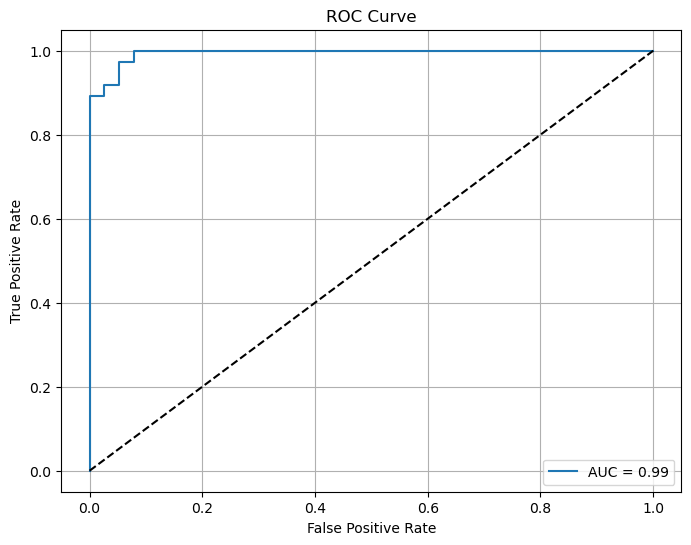

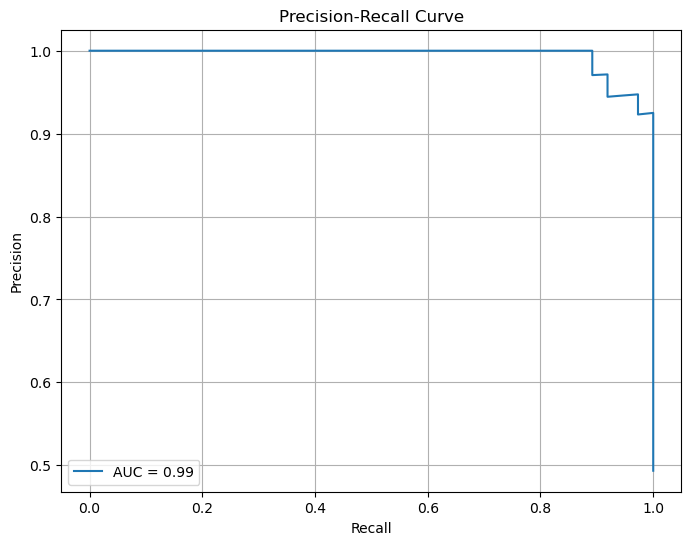

In [16]:
# Create a classifier
best_params = {'C': 206.913808111479, 'penalty': 'l1', 'solver': 'liblinear'}
clf = LogisticRegression(**best_params, random_state=42)

X_train=pd.read_csv("X_train.csv", index_col="ID")
X_test=pd.read_csv("X_test.csv", index_col="ID")
y_train= y_train_hr_encode.copy()
y_test= y_test_hr_encode.copy()
original_labels = label_encoder.inverse_transform(y_test_hr_encode)
class_labels= np.unique(original_labels)


# Train the Random Forest classifier
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred_probs = clf.predict_proba(X_test)
y_pred = (y_pred_probs[:, 1] > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate accuracy, precision, recall, and F1-score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Calculate ROC-AUC for this fold
fpr, tpr, _ = roc_curve(y_test, y_pred_probs[:, 1])
roc_auc = roc_auc_score(y_test, y_pred_probs[:, 1])

# Calculate and print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix_df = pd.DataFrame(conf_matrix, index=class_labels, columns=class_labels)
print("Confusion Matrix:")
print(confusion_matrix_df)

# Calculate Precision-Recall values
precision_fold, recall_fold, _ = precision_recall_curve(y_test, y_pred_probs[:, 1])

# Calculate PR-AUC for this fold
pr_auc = average_precision_score(y_test, y_pred_probs[:, 1])

# Print metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("ROC-AUC:", roc_auc)
print("PR-AUC:", pr_auc)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.grid()
plt.show()

# Plot the Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall_fold, precision_fold, label=f'AUC = {pr_auc:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.grid()
plt.show()